## Exoplanet Group Study - Project Notebook

##### Tamzin Jones

In [6]:
# Setup

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

print("Setup finished.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Setup finished.


### Session 1 - Tuesday, 13.01.26

I am in Team 2 - Target Selection and Data Analysis.


### Session 2 - Thursday, 15.01.26

**Making management plan**



*   Get Exoplanet Archive data.
    *   Filter to find sub-Neptunes.
    *   Provide a list of sub-Neptunes (high TSMs or high equilibrium temperature?) to group 1.
*   Write code to detect features in spectra.
    *   Code will find maxima in spectra (where and how tall).
    *   Will be used on simulated atmophere data provided by group 1.



**Researching how we should select sub-Neptunes in the sample**



1.   Download Exoplanet Archive.
2.   Filter so only sub-Neptunes are included (by radius range).
3.   Separate the sub-Neptunes into groups like cool, warm, hot based on equilibrium temperature.
4.   Sort by highest TSM in each group and select those with highest TSMs (good observability).


Graphs below from Brande et al. (2024).

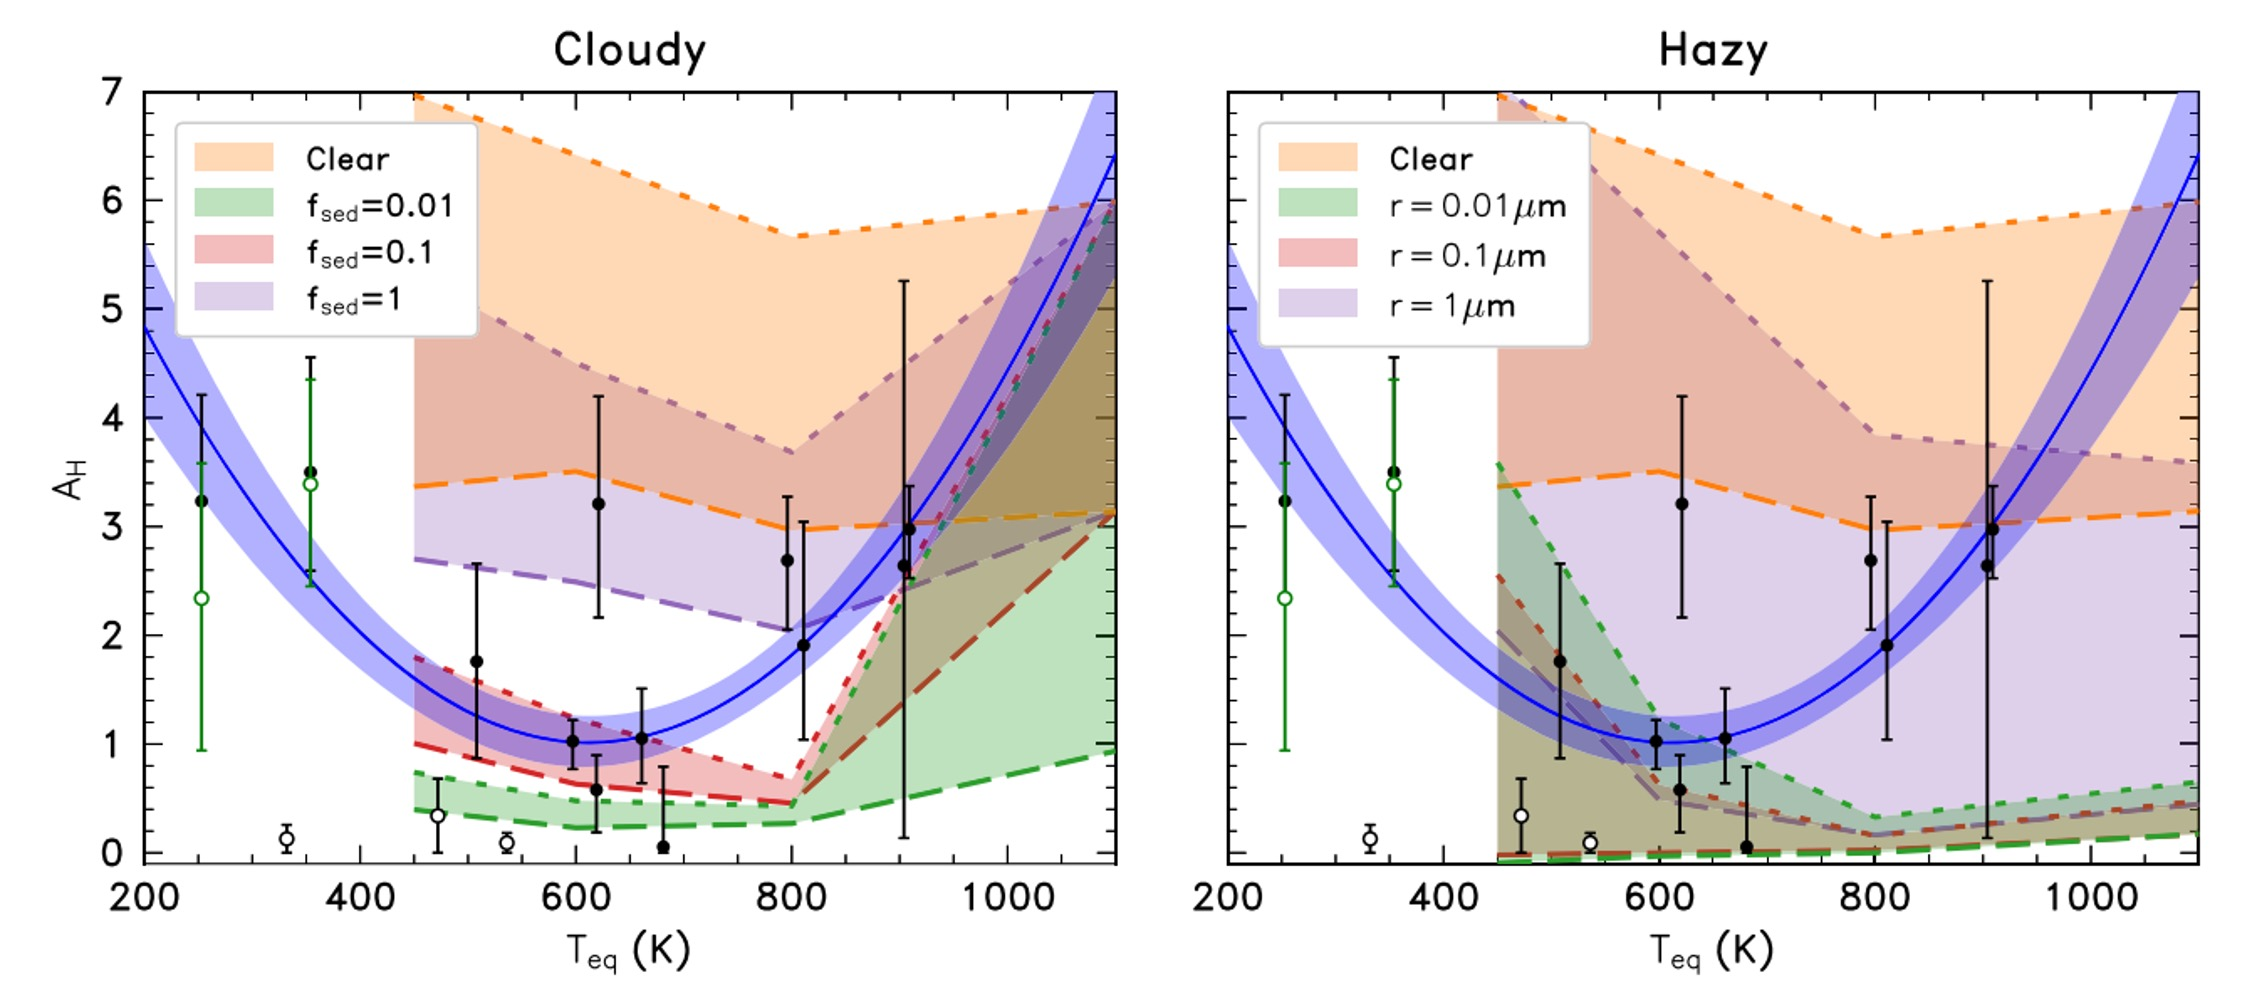

Working with Abi to figure out which parameters we need to get out fo the Exoplanet Archive.

To calculate TSM we need apparent magnitude of the host star in the J band.

Source: [Kempton et al. (2018), "A Framework for Prioritizing the TESS Planetary Candidates Most Amenable to Atmospheric Characterization"](https://iopscience.iop.org/article/10.1088/1538-3873/aadf6f/pdf)

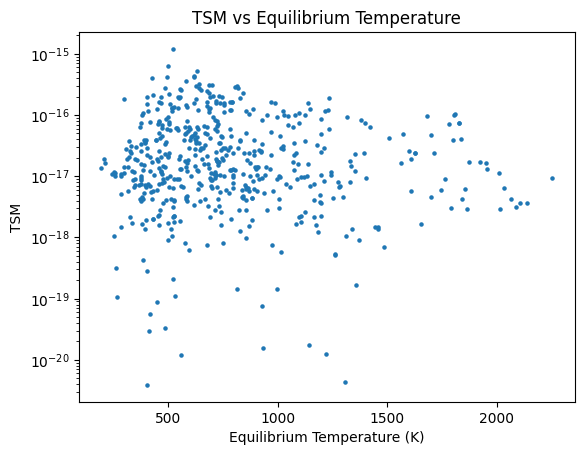

Minimum value of equilibrium temperature: 1.080092482737876K
Maximum value of equilibrium temperature: 7114.214909696282K


In [14]:
# Using UNFILTERED spreadsheet containing all exoplanets (not just sub-Neptunes) and all columns!!!!!!
# Filtered list will use radii between 1.3 and 2.8
# Will apply this code to the filtered list when I get it
file_path = "/content/drive/My Drive/Y3 Exoplanet Group Study/archive_data_15.01.26.xlsx"

# Reading the excel file
df = pd.read_excel(
    file_path,
    comment="#"
)

df.columns = df.columns.str.strip()

# Constants
R_sun = 6.957 * 10 ** 8
AU = 1.496 * 10 ** 11

# Assuming all the sub-Neptunes in the list have a Bond albedo similar to that of Neptune
A_bond_neptune = 0.3

# Extracting values
pl_rade = np.asarray(df["pl_rade"], dtype=float)
pl_eqt  = np.asarray(df["pl_eqt"], dtype=float)
st_teff = np.asarray(df["st_teff"], dtype=float)
st_rad  = np.asarray(df["st_rad"], dtype=float) * R_sun
pl_masse = np.asarray(df["pl_masse"], dtype=float)
sy_jmag = np.asarray(df["sy_jmag"], dtype=float)
a = np.asarray(df["pl_orbsmax"], dtype=float) * AU

# Calculating equilibrium temperature for each planet
T_eq_calc = st_teff * np.sqrt(st_rad / (2 * a)) * (1 - A_bond_neptune)**0.25

df["pl_eqt_calc"] = T_eq_calc

df["pl_eqt_calc"] = df["pl_eqt_calc"].where(
    (df["pl_eqt_calc"] > 0) & np.isfinite(df["pl_eqt_calc"])
)

# Function for the scale factor in the TSM formula
def tsm_scale_factor(Rp):

    S = np.full_like(Rp, np.nan, dtype=float)

    S[(Rp >= 1.5) & (Rp < 2.75)] = 0.190

    S[(Rp >= 2.75) & (Rp <= 4.0)] = 1.26

    return S

S = tsm_scale_factor(pl_rade)

# Calculating TSM for each planet
TSM = S * (pl_rade**3 * T_eq_calc) / (pl_masse * st_rad**2) * 10**(-sy_jmag / 5)

TSM = np.where(
    (TSM > 0) & np.isfinite(TSM),
    TSM,
    np.nan
)

df["TSM"] = TSM

# Plotting TSM vs equilibrium temperature to check it looks reasonable
plt.scatter(T_eq_calc, TSM, s = 5)
plt.xlabel("Equilibrium Temperature (K)")
plt.ylabel("TSM")
plt.title("TSM vs Equilibrium Temperature")
plt.yscale("log")
plt.show()

# Finding valid min and max values of equilibrium temperature
# This will be a good sanity check when I get the filtered list, should be around 200K and 3000K respectively
print(f"Minimum value of equilibrium temperature: {np.nanmin(T_eq_calc)}K")
print(f"Maximum value of equilibrium temperature: {np.nanmax(T_eq_calc)}K")

### Session 3 - Friday, 16.01.26

Continued writing the code above:

*   Implemented the TSM formula.
*   Plotted TSM vs equilibrium temperature graph.

While waiting for the filtered spreadsheet, I'll start working on separating the planets into equlibrium temperature bins.

In [ ]:
# Temperature bins:
# Cool: Up to 500K
# Warm: 500 to 800K
# Hot: 800 to 1100K
# Very hot: 1100 to 1400K
# Extremely hot: 1400 to 1700K
# Hottest: 1700K and over

# Rename to make clearer? Just number the groups?